In [0]:
import torch
from torch import nn
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import randint
import PIL
from PIL import Image, ImageDraw
import tqdm.notebook
import json
from torch.autograd import Variable
from torch.utils.tensorboard import SummaryWriter
from torchvision.models import vgg13
from torch.utils.data import Dataset
from torchvision.datasets.folder import default_loader
from torchvision import transforms
from torch.utils.data import DataLoader
import os
import sys
import skimage
import skimage.color
import skimage.filters
import skimage.io
import skimage.viewer
#import PyQt5.QtWidgets
from skimage import data
from skimage.io import imsave
from skimage.transform import resize
from skimage.transform import rotate
import cv2
from google.colab.patches import cv2_imshow

# Создание выборки

In [0]:
filenames2 = ['/content/drive/My Drive/Проект/Origs/36.jpg',
            '/content/drive/My Drive/Проект/Origs/39.jpg',
            '/content/drive/My Drive/Проект/Origs/41.jpg',
            '/content/drive/My Drive/Проект/Origs/42.jpg',
            '/content/drive/My Drive/Проект/Origs/45.jpg',
            '/content/drive/My Drive/Проект/Origs/46.jpg',
            '/content/drive/My Drive/Проект/Origs/47.jpg']

filenames_reserve = ['/content/drive/My Drive/Проект/Origs/36.jpg',
            '/content/drive/My Drive/Проект/Origs/38.jpg',
            '/content/drive/My Drive/Проект/Origs/39.jpg',
            '/content/drive/My Drive/Проект/Origs/40.jpg',
            '/content/drive/My Drive/Проект/Origs/41.jpg',
            '/content/drive/My Drive/Проект/Origs/42.jpg',
            '/content/drive/My Drive/Проект/Origs/43.jpg',
            '/content/drive/My Drive/Проект/Origs/45.jpg',
            '/content/drive/My Drive/Проект/Origs/46.jpg',
            '/content/drive/My Drive/Проект/Origs/47.jpg']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: /content/drive/My Drive/Проект/Dima_loch_chmo/3.jpeg is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: /content/drive/My Drive/Проект/Dima_loch_chmo/4.jpeg is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: /content/drive/My Drive/Проект/Dima_loch_chmo/5.jpeg is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: /content/drive/My Drive/Проект/Dima_loch_chmo/6.jpeg is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: /content/drive/My Drive/Проект/Dima_loch_chmo/7.jpeg is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: /content/drive/My Drive/Проект/Dima_loch_chmo/8.jpeg is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserW

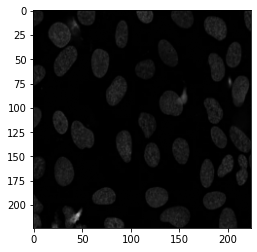

In [0]:
k=0
l = 0

for i in tqdm.notebook.tqdm(filenames_reserve):
    image = skimage.io.imread(fname=i)
    image = resize(image, (224, 224))
    plt.imshow(image)
    for r in range(12):
        image = rotate(image,30)
        imsave("/content/drive/My Drive/Проект/Dima_loch/" + str(l) + ".jpeg", image)
        mask1 = np.zeros((3,224,224))
        for p in range(3):
            for g in range(224):
                for f in range(224):
                    mask1[p][g][f] = image[g][f][p]
        mask1 = np.array(mask1[0])
        edges = skimage.filters.sobel(mask1)
        imsave("/content/drive/My Drive/Проект/Dima_loch_chmo/" + str(l)+ ".jpeg", edges)
        l += 1
        k+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image
  from ipykernel import kernelapp as app


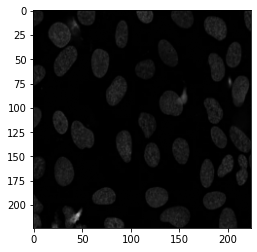

In [0]:
k=0
l = 0

for i in tqdm.notebook.tqdm(filenames_reserve):
    image = skimage.io.imread(fname=i)
    image = resize(image, (224, 224))
    plt.imshow(image)
    for r in range(4):
        image = rotate(image,90)
        image1 = image 
        for j in range(1,11):
            imsave("/content/drive/My Drive/Проект/New_exp/" + str(l) + ".jpeg", skimage.util.random_noise(image, mode='salt', amount= j/100))
            blur = skimage.color.rgb2gray(image1)
            blur = skimage.filters.gaussian(image1, sigma=1)
            t = skimage.filters.threshold_otsu(blur)
            mask = blur < t
            mask = np.array(torch.tensor(mask).float())
            imsave("/content/drive/My Drive/Проект/New_exp_mask/" + str(l)+ ".jpeg", mask)
            l += 1
        k+=1

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: /content/drive/My Drive/Проект/New_exp_mask/40.jpeg is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: /content/drive/My Drive/Проект/New_exp_mask/41.jpeg is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: /content/drive/My Drive/Проект/New_exp_mask/42.jpeg is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: /content/drive/My Drive/Проект/New_exp_mask/43.jpeg is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: /content/drive/My Drive/Проект/New_exp_mask/44.jpeg is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: /content/drive/My Drive/Проект/New_exp_mask/45.jpeg is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning

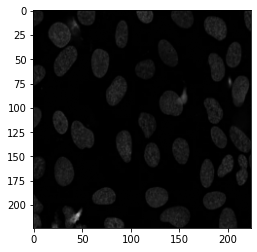

In [0]:
import tqdm.notebook
k=0
l = 0

for i in tqdm.notebook.tqdm(filenames_reserve):
    image = skimage.io.imread(fname=i)
    image = resize(image, (224, 224))
    plt.imshow(image)
    for r in range(4):
        image = rotate(image,90)
        image1 = image 
        for j in range(1,11):
            imsave("/content/drive/My Drive/Проект/New_exp/" + str(l) + ".jpeg", skimage.util.random_noise(image, mode='salt', amount= j/100))
            mask1 = np.zeros((3,224,224))
            for p in range(3):
                for g in range(224):
                    for f in range(224):
                        mask1[p][g][f] = image[g][f][p]
            mask1 = np.array(mask1[0])
            edges = skimage.filters.sobel(mask1)
            imsave("/content/drive/My Drive/Проект/New_exp_mask/" + str(l)+ ".jpeg", edges)
            l += 1
        k+=1

(224, 224)

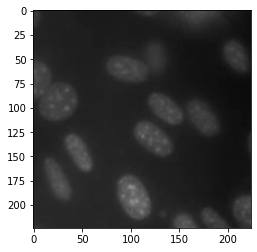

In [0]:
import torchvision
from torchvision import transforms
filename = '/content/drive/My Drive/Проект/Origs/40.jpg'
mask = Image.open(filename)
process = transforms.Compose([#transforms.Grayscale(num_output_channels=1),
                            torchvision.transforms.CenterCrop(200),
                            transforms.Resize([224,224]),
                            torchvision.transforms.RandomAffine(0)])
image = process(mask)
plt.imshow(image)
image.size

# Создание нейросети

### Полносвязная нейросеть

In [0]:
a = []
for i in range(0,400):
    a.append("/content/drive/My Drive/Проект/New_exp/" + str(i)+ ".jpeg")

In [0]:
mas = []
for i in a:
  image = Image.open(i)
  h = pd.DataFrame(list(image.getdata()))
  n = np.array(h[0])
  mas.append(n)

data = np.array(mas)
d = {'data' : data}

In [0]:
numbers = []
for i in range(400):
    if i < 40:
        numbers.append(37)
    elif i >= 40 and i < 80:
        numbers.append(35)
    elif i >= 80 and i < 120:
        numbers.append(36)
    elif i >= 120 and i < 160:
        numbers.append(47)
    elif i >= 160 and i < 200:
        numbers.append(31)
    elif i >= 200 and i < 240:
        numbers.append(30)
    elif i >= 240 and i < 280:
        numbers.append(37)
    elif i >= 280 and i < 320:
        numbers.append(28)
    elif i >= 320 and i < 360:
        numbers.append(44)
    elif i >= 360:
        numbers.append(44)    

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data, 
    numbers,
    test_size=0.5, shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.FloatTensor(Y_train)
Y_test = torch.FloatTensor(Y_test)

In [0]:
torch.cuda.is_available()

True

In [0]:
class CellSuperCounter(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(CellSuperCounter, self).__init__()
        self.fc1 = torch.nn.Linear(224 * 224, n_hidden_neurons)
        self.ac1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons) 
        self.ac2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.ac3 = torch.nn.Tanh()
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 1)
        self.dropout = torch.nn.Dropout(p=0.2)
    
    def forward(self, x):
        x = self.fc1(x)
        #x = self.dropout(x)
        x = self.ac1(x)
        x = self.fc2(x)
        #x = self.dropout(x)
        x = self.ac2(x)
        x = self.fc3(x)
        x = self.dropout(x)
        x = self.ac3(x)
        x = self.fc4(x)
        #x = self.dropout(x)

        return x
    
cells = CellSuperCounter(100)

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cells = cells.to(device)

In [0]:
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(cells.parameters(), lr=1.0e-3)

In [0]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
Y_test = Y_test.to(device)
X_train = X_train.to(device)
Y_train = Y_train.to(device)

for epoch in tqdm.notebook.tqdm(range(400)):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = Y_train[batch_indexes].to(device)
        
        preds = cells.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = cells.forward(X_test)
    test_loss_history.append(loss(test_preds, Y_test))
    #print(test_preds, Y_test)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


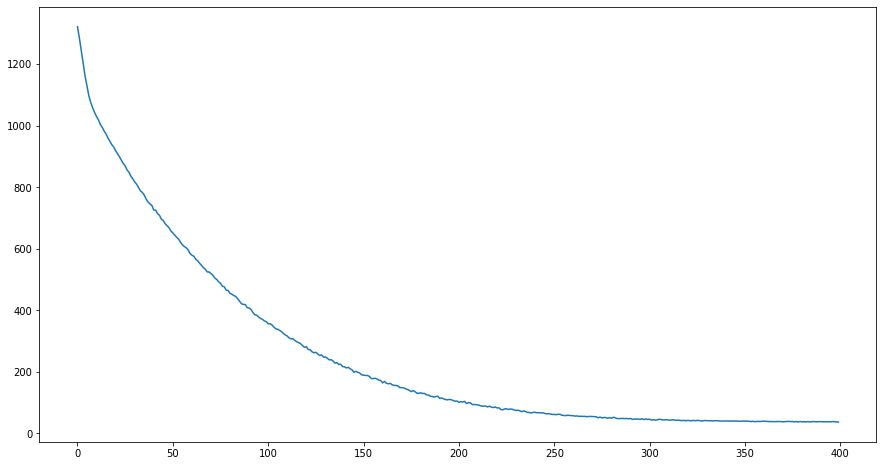

In [0]:
plt.figure(figsize=(15,8))
#plt.plot(test_accuracy_history)
plt.plot(test_loss_history)

tensor(-0.6813, device='cuda:0', grad_fn=<DivBackward0>)


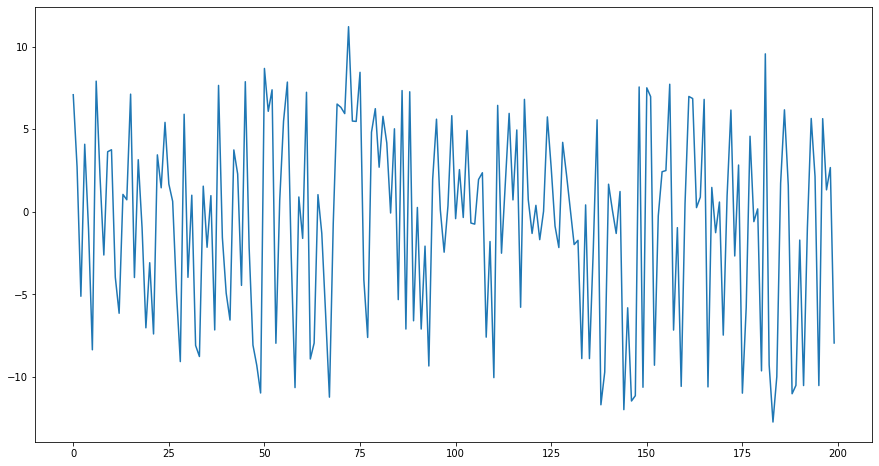

In [0]:
test_loss_history1 = []
loss = []
q = 0
g = 0
l = 0
plt.figure(figsize=(15,8))
for i in range(200):
    x = cells.forward(X_test[i]).to(device)
    #test_loss_history1.append(loss(x, Y_test[i]))
    q =  x[0] - Y_test[i]
    g+=q
    l = g/200
    loss.append(q)
plt.plot(loss)
print(l)

### Сверточная нейросеть

In [0]:
def conv3x3(in_channels, out_channels, dilation=1):
    return nn.Conv2d(in_channels, out_channels, 3, padding=dilation, dilation=dilation)

In [0]:
class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels, batch_norm=False):
        super().__init__()

        self.batch_norm = batch_norm

        self.conv1 = conv3x3(in_channels, out_channels)
        if self.batch_norm:
            self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu1 = nn.ReLU()
        self.conv2 = conv3x3(out_channels, out_channels)
        if self.batch_norm:
            self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu2 = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        if self.batch_norm:
            x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        if self.batch_norm:
            x = self.bn2(x)
        x = self.relu2(x)
        return x

In [0]:
class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels, batch_norm=False):
        super().__init__()

        self.block = nn.Sequential()
        self.block.add_module('conv1', conv3x3(in_channels, out_channels))
        if batch_norm:
            self.block.add_module('bn1', nn.BatchNorm2d(out_channels))
        self.block.add_module('relu1', nn.ReLU())
        self.block.add_module('conv2', conv3x3(out_channels, out_channels))
        if batch_norm:
            self.block.add_module('bn2', nn.BatchNorm2d(out_channels))
        self.block.add_module('relu2', nn.ReLU())

    def forward(self, x):
        return self.block(x)

In [0]:
class Encoder(nn.Module):
    def __init__(self, in_channels, num_filters, num_blocks):
        super().__init__()

        self.num_blocks = num_blocks
        for i in range(num_blocks):
            in_channels = in_channels if not i else num_filters * 2 ** (i - 1)
            out_channels = num_filters * 2**i
            self.add_module(f'block{i + 1}', EncoderBlock(in_channels, out_channels))
            if i != num_blocks - 1:
                self.add_module(f'pool{i + 1}', nn.MaxPool2d(2, 2))

    def forward(self, x):
        acts = []
        for i in range(self.num_blocks):
            x = self.__getattr__(f'block{i + 1}')(x)
            acts.append(x)
            if i != self.num_blocks - 1:
                x = self.__getattr__(f'pool{i + 1}')(x)
        return acts

In [0]:
class DecoderBlock(nn.Module):
    def __init__(self, out_channels):
        super().__init__()

        self.uppool = nn.Upsample(scale_factor=2, mode='bilinear')
        self.upconv = conv3x3(out_channels * 2, out_channels)
        self.conv1 = conv3x3(out_channels * 2, out_channels)
        self.conv2 = conv3x3(out_channels, out_channels)

    def forward(self, down, left):
        x = self.uppool(down)
        x = self.upconv(x)
        x = torch.cat([left, x], 1)
        x = self.conv1(x)
        x = self.conv2(x)
        return x

In [0]:
class Decoder(nn.Module):
    def __init__(self, num_filters, num_blocks):
        super().__init__()

        for i in range(num_blocks):
            self.add_module(f'block{num_blocks - i}', DecoderBlock(num_filters * 2**i))

    def forward(self, acts):
        up = acts[-1]
        for i, left in enumerate(acts[-2::-1]):
            up = self.__getattr__(f'block{i + 1}')(up, left)
        return up

In [0]:
class UNet(nn.Module):
    def __init__(self, num_classes, in_channels=3, num_filters=64, num_blocks=4):
        super().__init__()

        print(f'=> Building {num_blocks}-blocks {num_filters}-filter U-Net')

        self.encoder = Encoder(in_channels, num_filters, num_blocks)
        self.decoder = Decoder(num_filters, num_blocks - 1)
        self.final = nn.Conv2d(num_filters, num_classes, 1)

    def forward(self, x):
        acts = self.encoder(x)
        x = self.decoder(acts)
        x = self.final(x)
        return x

In [0]:
class VGG13Encoder(nn.Module):
    def __init__(self, num_blocks, pretrained=True):
        super().__init__()

        backbone = vgg13(pretrained=pretrained).features

        self.num_blocks = num_blocks
        for i in range(self.num_blocks):
            block = nn.Sequential(*[backbone[j] for j in range(i * 5, i * 5 + 4)])
            self.add_module(f'block{i + 1}', block)
            if i != num_blocks - 1:
                self.add_module(f'pool{i + 1}', nn.MaxPool2d(2, 2))

    def forward(self, x):
        acts = []
        for i in range(self.num_blocks):
            x = self.__getattr__(f'block{i + 1}')(x)
            acts.append(x)
            if i != self.num_blocks - 1:
                x = self.__getattr__(f'pool{i + 1}')(x)
        return acts

In [0]:
class UNet_vgg(nn.Module):
    def __init__(self, num_classes, in_channels=3, num_filters=64, num_blocks=4):
        super().__init__()

        print(f'=> Building {num_blocks}-blocks {num_filters}-filter U-Net')

        self.encoder = VGG13Encoder(num_blocks)
        self.decoder = Decoder(num_filters, num_blocks - 1)
        self.final = nn.Conv2d(num_filters, num_classes, 1)

    def forward(self, x):
        acts = self.encoder(x)
        x = self.decoder(acts)
        x = self.final(x)
        return x

In [0]:
class DS_folder(Dataset):
    """Датасет изображений и их масок с диска"""
    def __init__(self,n, path_imgs, path_labels, transform=None, limit=None, loader=default_loader):
      self.image = path_imgs
      self.label = path_labels
      self.n = n
 
    def __getitem__(self, index):
      filename = self.image + '/'+ str(index) + '.jpeg'
      image = skimage.io.imread(fname=filename)
      image1 = np.zeros((3,224,224))
      for i in range(3):
        for j in range(224):
          for k in range(224):
            image1[i][j][k] = image[j][k][i]

      filename = self.label + '/' + str(index) + '.jpeg'
      mask = skimage.io.imread(fname=filename)
      mask1 = np.zeros((3,224,224))
      for i in range(3):
        for j in range(224):
          for k in range(224):
            mask1[i][j][k] = mask[j][k][i]
      mask1 = np.array([mask1[0]])

      return torch.LongTensor(image1),torch.LongTensor(mask1)
    
    def __len__(self):
        return self.n

In [0]:
class DS_folder1(Dataset):
    """Датасет изображений и их масок с диска"""
    def __init__(self,n, path_imgs, path_labels, transform=None, limit=None, loader=default_loader):
      self.image = path_imgs
      self.label = path_labels
      self.n = n
 
    def __getitem__(self, index):
      filename = self.image + '/'+ str(index) + '.jpeg'
      image = skimage.io.imread(fname=filename)
      image1 = np.zeros((3,224,224))
      for i in range(3):
        for j in range(224):
          for k in range(224):
            image1[i][j][k] = image[j][k][i]

      filename = self.label + '/' + str(index) + '.jpeg'
      mask = skimage.io.imread(fname=filename)
      mask1 = np.array([mask])

      return torch.LongTensor(image1),torch.LongTensor(mask1)
    
    def __len__(self):
        return self.n

In [0]:
from tqdm import tqdm
from PIL import Image
def train_epoch(train_loader, model, lossfun, optimizer, device, writer, n_epoch):
    total_loss = 0.0
    total = 0.0
    model.train()
    total_len = len(train_loader)
    for i , data in enumerate(train_loader,0):
      inputs, labels = data
      inputs, labels = Variable(inputs),Variable(labels)
      inputs, labels = inputs.to(device),labels.to(device)

      y_pred_train = model(inputs.float())
      y_pred_train = y_pred_train.to(device)
      loss = lossfun(y_pred_train,labels.float())
      total_loss += loss.item()

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      writer.add_scalars("Loss_while_training", {"loss": loss.item()}, n_epoch * total_len + i)
    total = i + 1
    #return total_loss / total

def evaluate(loader, model, lossfun, device):
    model.eval()
    total_loss = 0.0
    total = 0.0

    for it, data in enumerate(loader):
      inputs, labels = data
      inputs = inputs.to(device) 
      labels = labels.to(device)
      y_pred_train = model(inputs.float())
      y_pred_train = y_pred_train.to(device)
      loss = lossfun(y_pred_train,labels.float())
      total_loss += loss.item()

    total = it + 1
    return total_loss / total
    

def train(train_loader, test_loader, model, lossfun, optimizer, \
          device, num_epochs):
    train_loss_ = []
    test_loss_ = []
    train_loss = 0
    test_loss = 0
    img_map = torch.zeros(224,224)
    writer = SummaryWriter()
    for epoch in range(num_epochs):
      train_epoch(train_loader, model, lossfun, optimizer, device, writer, num_epochs)
            
      writer.add_scalars("Loss_train", {"loss": train_loss})
      train_loss_.append(train_loss)

      test_loss = evaluate(test_loader, model, lossfun, device)
      writer.add_scalars("Loss_test", {"loss": test_loss})
      test_loss_.append(test_loss)
        
      print(f'Epoch: {epoch+1:3d}/{num_epochs:3d} '
            f'Training Loss: {train_loss_[epoch]:.3f}, Testing Loss: {test_loss_[epoch]:.3f}, ')
      img_map = model(next(iter(test_loader))[0].float())[0][0]
      img_real = next(iter(test_loader))[1].float()[0][0]
      #writer.add_image("Image_map", img_map.detach().sigmoid(), epoch)
      plt.imshow(img_real.detach())
      plt.show()
      plt.imshow(img_map.detach())
      plt.show()
        
    #writer.export_scalars_to_json("./all_scalars.json")
    writer.close()
    return train_loss_, test_loss_

In [0]:
train_ds = DS_folder1(120,'/content/drive/My Drive/Проект/Dima_loch', "/content/drive/My Drive/Проект/Dima_loch_chmo", transforms.ToTensor(), limit=1000)
train_loader = DataLoader(train_ds, batch_size=10, shuffle=True, num_workers=0)

test_ds = DS_folder1(120,'/content/drive/My Drive/Проект/Dima_loch', "/content/drive/My Drive/Проект/Dima_loch_chmo", transforms.ToTensor(), limit=500)
test_loader = DataLoader(test_ds, batch_size=10, shuffle=True, num_workers=0)

In [91]:
unet = UNet_vgg(num_classes = 1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

=> Building 4-blocks 64-filter U-Net


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Epoch:   1/ 10 Training Loss: 0.000, Testing Loss: 0.904, 


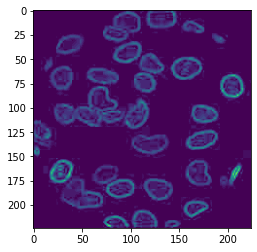

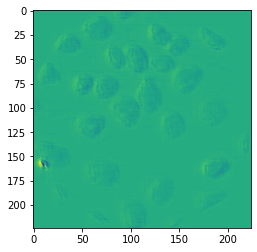

Epoch:   2/ 10 Training Loss: 0.000, Testing Loss: 0.887, 


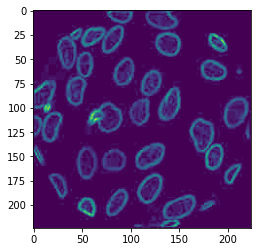

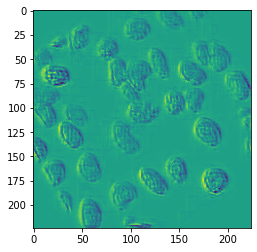

Epoch:   3/ 10 Training Loss: 0.000, Testing Loss: 0.871, 


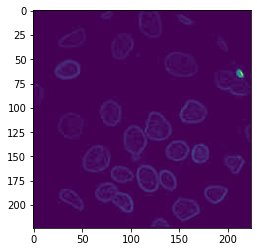

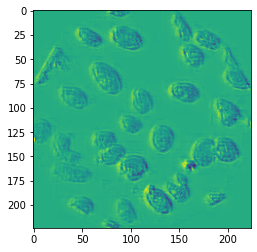

Epoch:   4/ 10 Training Loss: 0.000, Testing Loss: 0.856, 


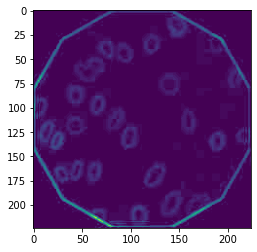

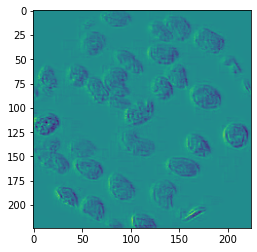

Epoch:   5/ 10 Training Loss: 0.000, Testing Loss: 0.842, 


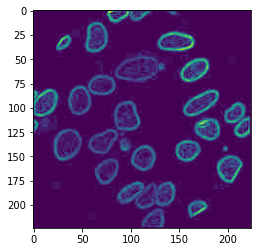

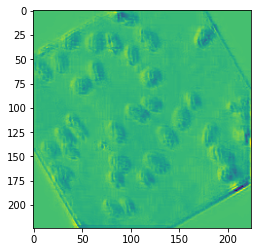

Epoch:   6/ 10 Training Loss: 0.000, Testing Loss: 0.829, 


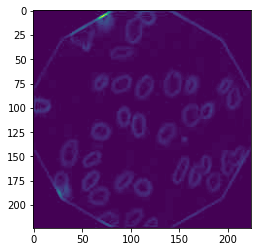

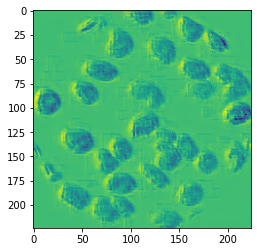

Epoch:   7/ 10 Training Loss: 0.000, Testing Loss: 0.816, 


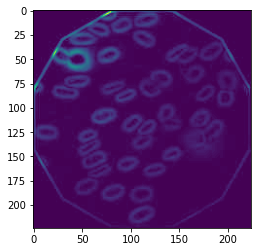

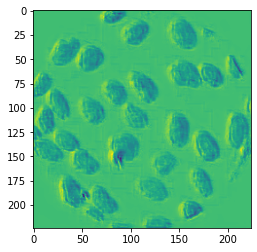

Epoch:   8/ 10 Training Loss: 0.000, Testing Loss: 0.803, 


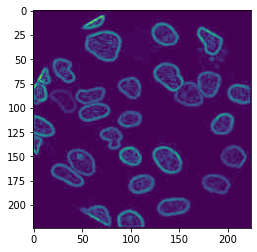

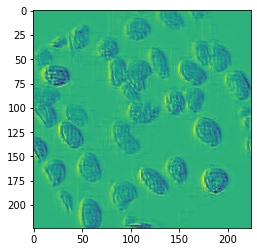

Epoch:   9/ 10 Training Loss: 0.000, Testing Loss: 0.790, 


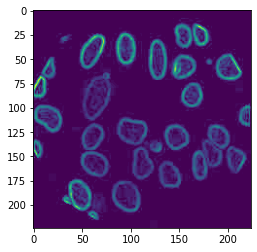

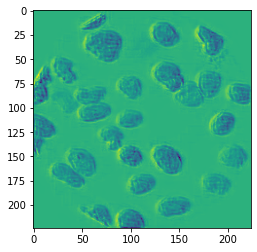

Epoch:  10/ 10 Training Loss: 0.000, Testing Loss: 0.777, 


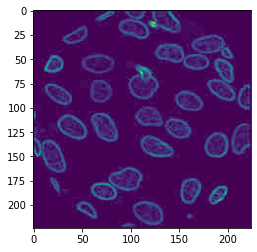

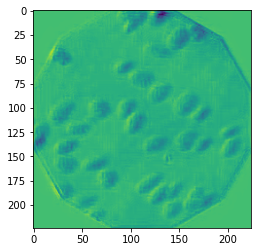

CPU times: user 2h 10min 16s, sys: 25.9 s, total: 2h 10min 42s
Wall time: 2h 10min 52s


In [92]:
%%time
#меняйте параметры ниже при необходимости
import torch.optim as optim
learning_rate = 0.0001
optimizer = optim.Adadelta(filter(lambda p: p.requires_grad, unet.parameters()), lr=learning_rate)
num_epochs = 10
lossfun = nn.HingeEmbeddingLoss()
train(train_loader, test_loader, unet, lossfun, optimizer, device, num_epochs)

In [0]:
%%time
#меняйте параметры ниже при необходимости
import torch.optim as optim
learning_rate = 0.0001
optimizer = optim.Adadelta(filter(lambda p: p.requires_grad, unet.parameters()), lr=learning_rate)
num_epochs = 1
lossfun = nn.HingeEmbeddingLoss()
train(train_loader, test_loader, unet, lossfun, optimizer, device, num_epochs)

Уменьшим batch_size до 2

In [0]:
%%time
#меняйте параметры ниже при необходимости
import torch.optim as optim
learning_rate = 0.0001
optimizer = optim.Adadelta(filter(lambda p: p.requires_grad, unet.parameters()), lr=learning_rate)
num_epochs = 1
lossfun = nn.HingeEmbeddingLoss()
train(train_loader, test_loader, unet, lossfun, optimizer, device, num_epochs)

Увеличили batch_size до 10.

In [0]:
%%time
#меняйте параметры ниже при необходимости
import torch.optim as optim
learning_rate = 0.0001
optimizer = optim.Adadelta(filter(lambda p: p.requires_grad, unet.parameters()), lr=learning_rate)
num_epochs = 1
lossfun = nn.HingeEmbeddingLoss()
train(train_loader, test_loader, unet, lossfun, optimizer, device, num_epochs)

In [0]:
%%time
#меняйте параметры ниже при необходимости
import torch.optim as optim
learning_rate = 0.001
optimizer = optim.Adadelta(filter(lambda p: p.requires_grad, unet.parameters()), lr=learning_rate)
num_epochs = 1
lossfun = nn.HingeEmbeddingLoss()
train(train_loader, test_loader, unet, lossfun, optimizer, device, num_epochs)

In [0]:
%%time
#меняйте параметры ниже при необходимости
import torch.optim as optim
learning_rate = 0.001
optimizer = optim.Adadelta(filter(lambda p: p.requires_grad, unet.parameters()), lr=learning_rate)
num_epochs = 1
lossfun = nn.HingeEmbeddingLoss()
train(train_loader, test_loader, unet, lossfun, optimizer, device, num_epochs)

In [0]:
%%time
#меняйте параметры ниже при необходимости
import torch.optim as optim
learning_rate = 0.0001
optimizer = optim.Adadelta(filter(lambda p: p.requires_grad, unet.parameters()), lr=learning_rate)
num_epochs = 1
lossfun = nn.HingeEmbeddingLoss()
train(train_loader, test_loader, unet, lossfun, optimizer, device, num_epochs)

In [0]:
%%time
#меняйте параметры ниже при необходимости
import torch.optim as optim
learning_rate = 0.0001
optimizer = optim.Adadelta(filter(lambda p: p.requires_grad, unet.parameters()), lr=learning_rate)
num_epochs = 2
lossfun = nn.HingeEmbeddingLoss()
train(train_loader, test_loader, unet, lossfun, optimizer, device, num_epochs)